In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/simulated-dataset-jee-dropout-after-class-12/JEE_Dropout_After_Class_12.csv


In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot  as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#M.L Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score



In [75]:
df = pd.read_csv("/kaggle/input/simulated-dataset-jee-dropout-after-class-12/JEE_Dropout_After_Class_12.csv")


In [76]:
df.head()

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,CBSE,70.09,1,FIITJEE,5.4,Low,Upto 10th,Urban,Low,No,No,1
1,70.06,58.75,64.33,State,78.00,1,FIITJEE,5.5,Mid,Upto 10th,Urban,Low,Yes,No,0
2,81.07,37.27,60.83,ICSE,64.36,1,FIITJEE,7.0,Low,PG,Semi-Urban,Medium,Yes,No,1
3,93.32,60.72,69.33,ICSE,73.21,1,FIITJEE,2.1,Low,12th,Semi-Urban,Medium,Yes,Yes,0
4,68.72,77.73,82.37,CBSE,89.02,1,Allen,6.3,Mid,Graduate,Semi-Urban,High,No,Yes,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   jee_main_score        5000 non-null   float64
 1   jee_advanced_score    5000 non-null   float64
 2   mock_test_score_avg   5000 non-null   float64
 3   school_board          5000 non-null   object 
 4   class_12_percent      5000 non-null   float64
 5   attempt_count         5000 non-null   int64  
 6   coaching_institute    3791 non-null   object 
 7   daily_study_hours     5000 non-null   float64
 8   family_income         5000 non-null   object 
 9   parent_education      5000 non-null   object 
 10  location_type         5000 non-null   object 
 11  peer_pressure_level   5000 non-null   object 
 12  mental_health_issues  5000 non-null   object 
 13  admission_taken       5000 non-null   object 
 14  dropout               5000 non-null   int64  
dtypes: float64(5), int64(

In [78]:
df.describe()

,jee_main_score,jee_advanced_score,mock_test_score_avg,class_12_percent,attempt_count,daily_study_hours,dropout
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,71.961226,65.736404,68.110756,74.957400,1.504600,4.483860,0.207200
std,13.668497,15.909248,11.938849,9.885309,0.500029,1.984723,0.405341
min,26.620000,3.240000,27.490000,50.000000,1.000000,0.000000,0.000000
25%,62.790000,55.017500,60.070000,68.067500,1.000000,3.100000,0.000000
50%,72.190000,65.720000,68.120000,74.940000,2.000000,4.500000,0.000000
75%,81.322500,76.835000,76.110000,81.842500,2.000000,5.900000,0.000000
max,100.000000,100.000000,100.000000,100.000000,2.000000,10.000000,1.000000


In [79]:
df.shape

(5000, 15)

In [80]:
df.dtypes

jee_main_score          float64
jee_advanced_score      float64
mock_test_score_avg     float64
school_board             object
class_12_percent        float64
attempt_count             int64
coaching_institute       object
daily_study_hours       float64
family_income            object
parent_education         object
location_type            object
peer_pressure_level      object
mental_health_issues     object
admission_taken          object
dropout                   int64
dtype: object

In [81]:
df.columns

Index(['jee_main_score', 'jee_advanced_score', 'mock_test_score_avg',
       'school_board', 'class_12_percent', 'attempt_count',
       'coaching_institute', 'daily_study_hours', 'family_income',
       'parent_education', 'location_type', 'peer_pressure_level',
       'mental_health_issues', 'admission_taken', 'dropout'],
      dtype='object')

In [82]:
print(df.isnull().sum())

jee_main_score             0
jee_advanced_score         0
mock_test_score_avg        0
school_board               0
class_12_percent           0
attempt_count              0
coaching_institute      1209
daily_study_hours          0
family_income              0
parent_education           0
location_type              0
peer_pressure_level        0
mental_health_issues       0
admission_taken            0
dropout                    0
dtype: int64


Exploratory Data Analysis (EDA)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

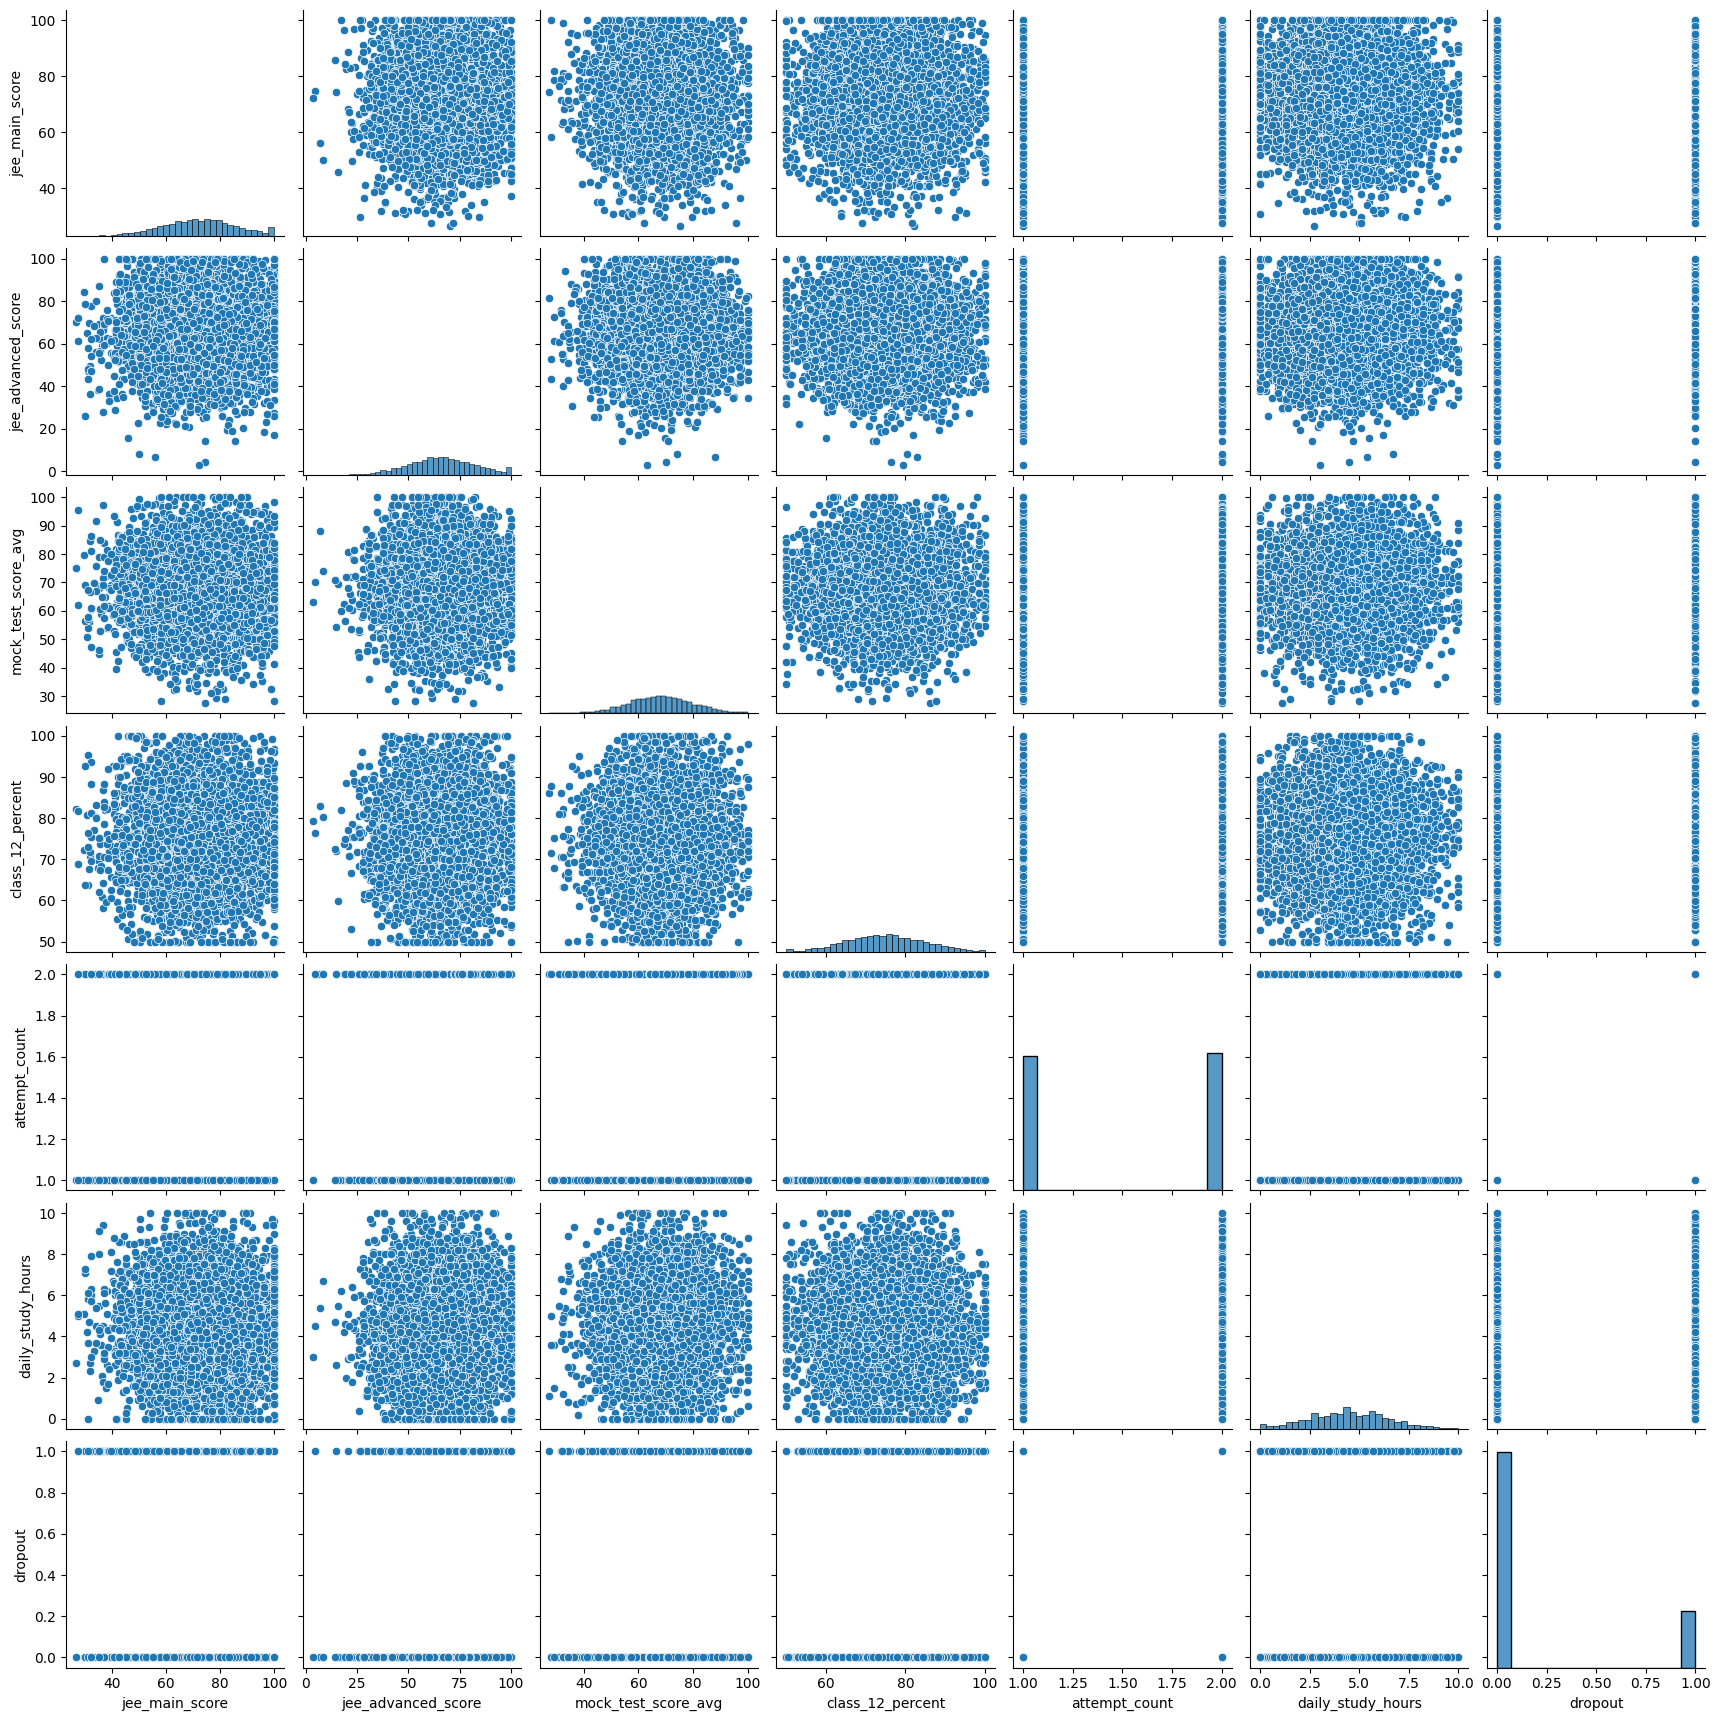

In [83]:
sns.pairplot(df)
plt.show()

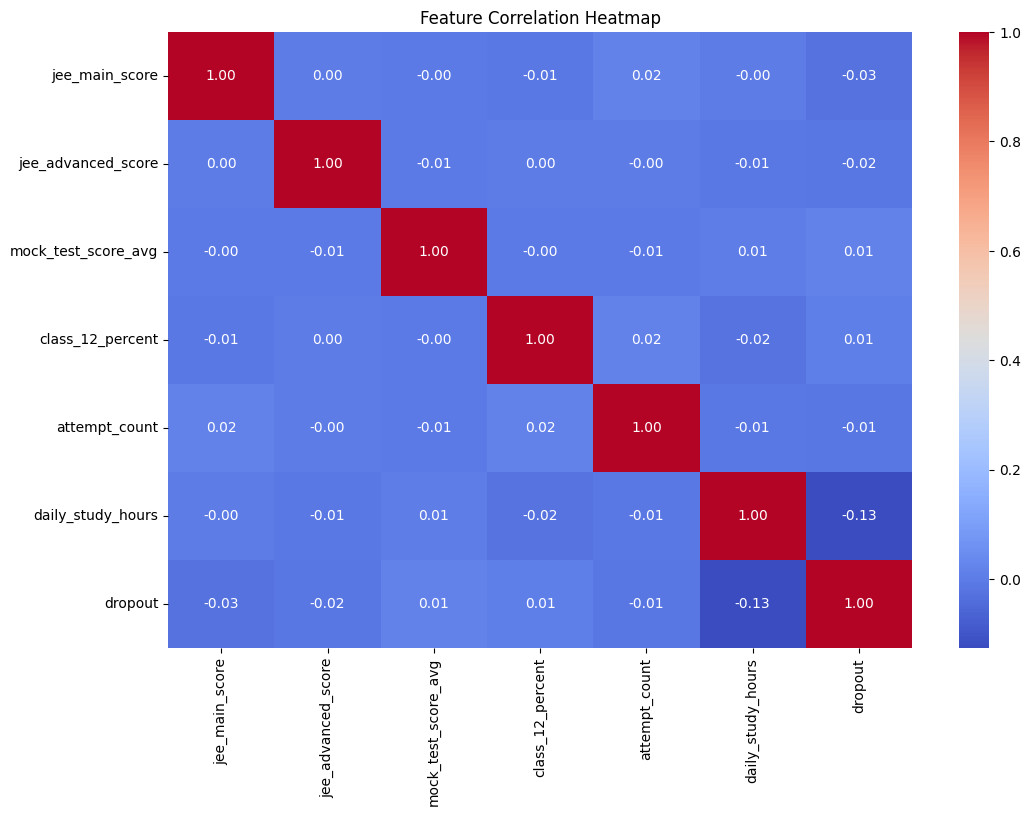

In [86]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

2. Distribution of Dropouts vs Non-Dropouts

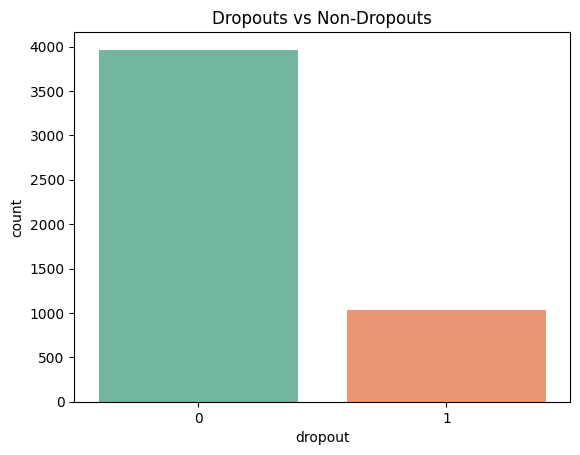

In [85]:
sns.countplot(data=df, x='dropout', palette='Set2')
plt.title("Dropouts vs Non-Dropouts")
plt.show()

3. Barplot: Coaching Institute vs Dropout Rate
   

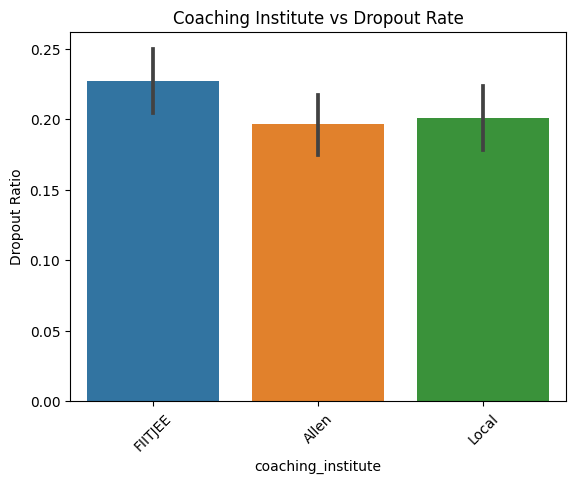

In [84]:
sns.barplot(data=df, x='coaching_institute', y='dropout', estimator=lambda x: sum(x)/len(x))
plt.title("Coaching Institute vs Dropout Rate")
plt.xticks(rotation=45)
plt.ylabel("Dropout Ratio")
plt.show()

4. Histogram: JEE Main / Advanced Score

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


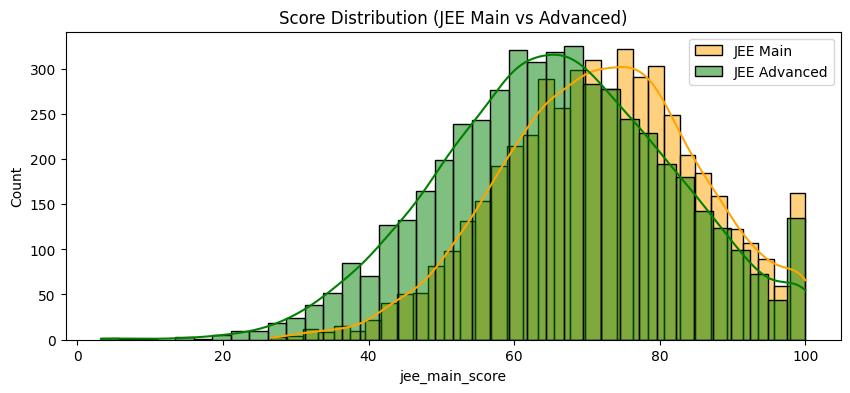

In [93]:
plt.figure(figsize=(10, 4))
sns.histplot(df['jee_main_score'], kde=True, color='orange', label='JEE Main')
sns.histplot(df['jee_advanced_score'], kde=True, color='Green', label='JEE Advanced')
plt.title("Score Distribution (JEE Main vs Advanced)")
plt.legend()
plt.show()

5. Violin Plot: Daily Study Hours by Mental Health

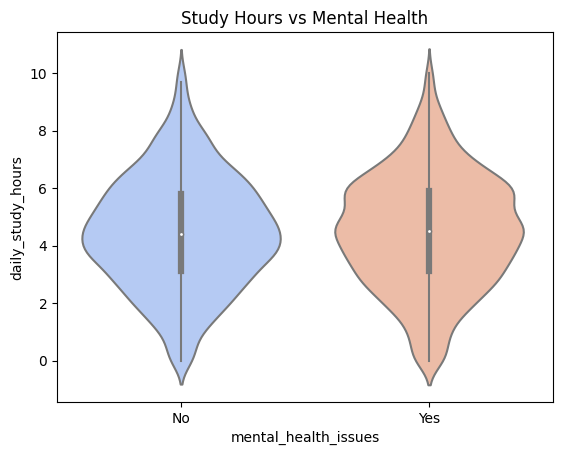

In [94]:
sns.violinplot(data=df, x='mental_health_issues', y='daily_study_hours', palette='coolwarm')
plt.title("Study Hours vs Mental Health")
plt.show()


7. Scatter: Study Hour vs JEE main/adv score

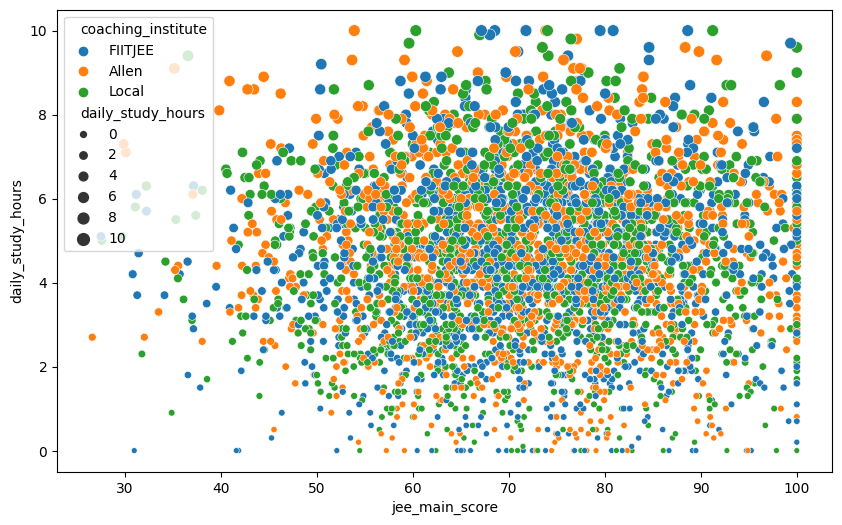

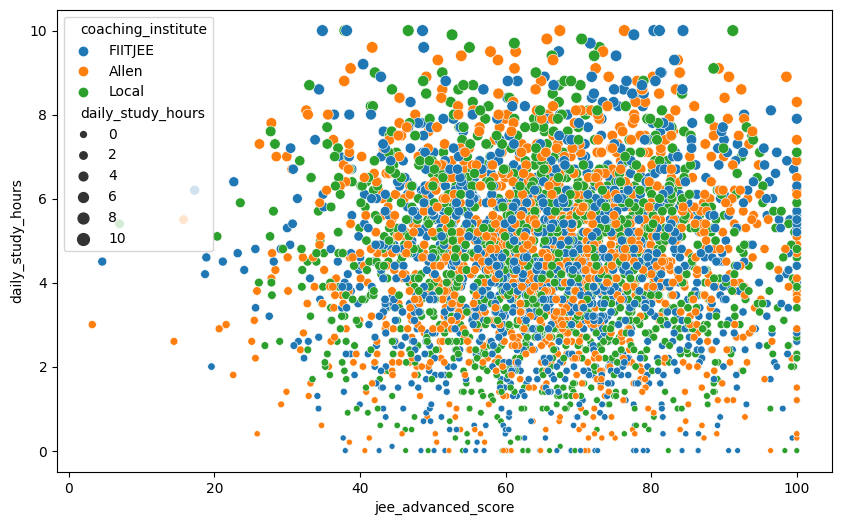

In [95]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x = df['jee_main_score'], y= df['daily_study_hours'], hue=df['coaching_institute'], size=df['daily_study_hours'])
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x = df['jee_advanced_score'], y= df['daily_study_hours'], hue=df['coaching_institute'], size=df['daily_study_hours'])
plt.show()


6. Stacked Bar Chart: Admission Taken vs Dropout

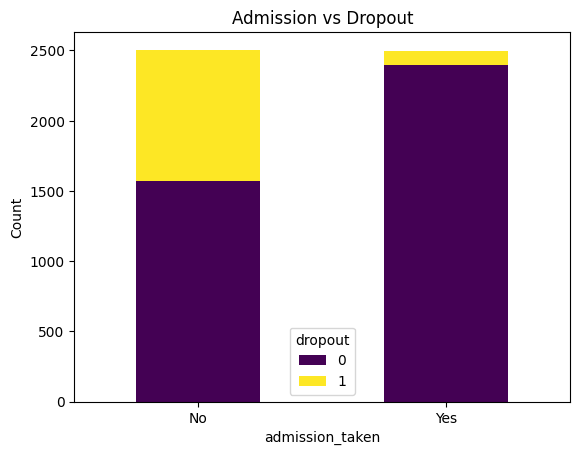

In [96]:
cross_tab = pd.crosstab(df['admission_taken'], df['dropout'])
cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Admission vs Dropout")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()